In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
bp = pd.read_csv('plano_saude.csv', sep=";") 
bp

,idade,custo
0,18,871
1,23,1100
2,25,1393
3,33,1654
4,34,1915
5,43,2100
6,48,2356
7,51,2698
8,58,2959
9,63,3000


In [3]:
def PrevisaoRegressaoLinear (x, y, v):
    x = np.array(x)
    y = np.array(y)
    
    cov_xy = np.corrcoef(x, y)[0,1]
    inclinacao = cov_xy*(np.std(y)/np.std(x))
    interseccao = np.mean(y) - inclinacao * np.mean(x)
    previsao = interseccao + inclinacao * v
    return float(previsao)

In [4]:
x = bp['idade']
y = bp['custo']

lr = PrevisaoRegressaoLinear(x,y,54)
lr

2657.3594760672704

In [5]:
x = x.values.reshape(-1, 1)
x.shape

(11, 1)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
regressor.intercept_

np.float64(149.05772962483752)

In [8]:
regressor.coef_

array([46.45003234])

In [9]:
previssoes = regressor.predict(x)
previssoes

array([ 985.15831177, 1217.40847348, 1310.30853816, 1681.9087969 ,
       1728.35882924, 2146.40912031, 2378.65928202, 2518.00937904,
       2843.15960543, 3075.40976714, 3261.20989651])

In [10]:
grafico = px.scatter(x = x.ravel(), y = y)
grafico.add_scatter(x = x.ravel(), y =previssoes, name = 'Regressao')
grafico.show()

In [11]:
previssao_54anos = regressor.predict([[54]])

print(f'A previsão para 54 anos é: (previsao_54anos[0]:.2f)')

A previsão para 54 anos é: (previsao_54anos[0]:.2f)


In [12]:
regressor.score(x.reshape(-1, 1), y)

0.9759542217686598

In [13]:
casas = pd.read_csv('house_prices.csv', sep=";")
casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,"47,5112","-122,257",1340,5650
1,6414100192,20141209T000000,538000,3,"2,25",2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,"47,721","-122,319",1690,7639
2,5631500400,20150225T000000,180000,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,"47,7379","-122,233",2720,8062
3,2487200875,20141209T000000,604000,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,"47,5208","-122,393",1360,5000
4,1954400510,20150218T000000,510000,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,"47,6168","-122,045",1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,"2,5",1530,1131,3,0,0,...,8,1530,0,2009,0,98103,"47,6993","-122,346",1530,1509
21609,6600060120,20150223T000000,400000,4,"2,5",2310,5813,2,0,0,...,8,2310,0,2014,0,98146,"47,5107","-122,362",1830,7200
21610,1523300141,20140623T000000,402101,2,"0,75",1020,1350,2,0,0,...,7,1020,0,2009,0,98144,"47,5944","-122,299",1020,2007
21611,291310100,20150116T000000,400000,3,"2,5",1600,2388,2,0,0,...,8,1600,0,2004,0,98027,"47,5345","-122,069",1410,1287


In [14]:
casas.drop('date', axis=1, inplace=True)

In [15]:
casas.describe()

,id,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,3.370842,2079.899736,1.510697e+04,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,2.876566e+09,0.930062,918.440897,4.142051e+04,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,1.000102e+06,0.000000,290.000000,5.200000e+02,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,2.123049e+09,3.000000,1427.000000,5.040000e+03,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,3.904930e+09,3.000000,1910.000000,7.618000e+03,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,7.308900e+09,4.000000,2550.000000,1.068800e+04,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,9.900000e+09,33.000000,13540.000000,1.651359e+06,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [16]:
casas.isnull

<bound method DataFrame.isnull of                id   price  bedrooms bathrooms  sqft_living  sqft_lot floors  \
0      7129300520  221900         3         1         1180      5650      1   
1      6414100192  538000         3      2,25         2570      7242      2   
2      5631500400  180000         2         1          770     10000      1   
3      2487200875  604000         4         3         1960      5000      1   
4      1954400510  510000         3         2         1680      8080      1   
...           ...     ...       ...       ...          ...       ...    ...   
21608   263000018  360000         3       2,5         1530      1131      3   
21609  6600060120  400000         4       2,5         2310      5813      2   
21610  1523300141  402101         2      0,75         1020      1350      2   
21611   291310100  400000         3       2,5         1600      2388      2   
21612  1523300157  325000         2      0,75         1020      1076      2   

       waterfront

<Axes: >

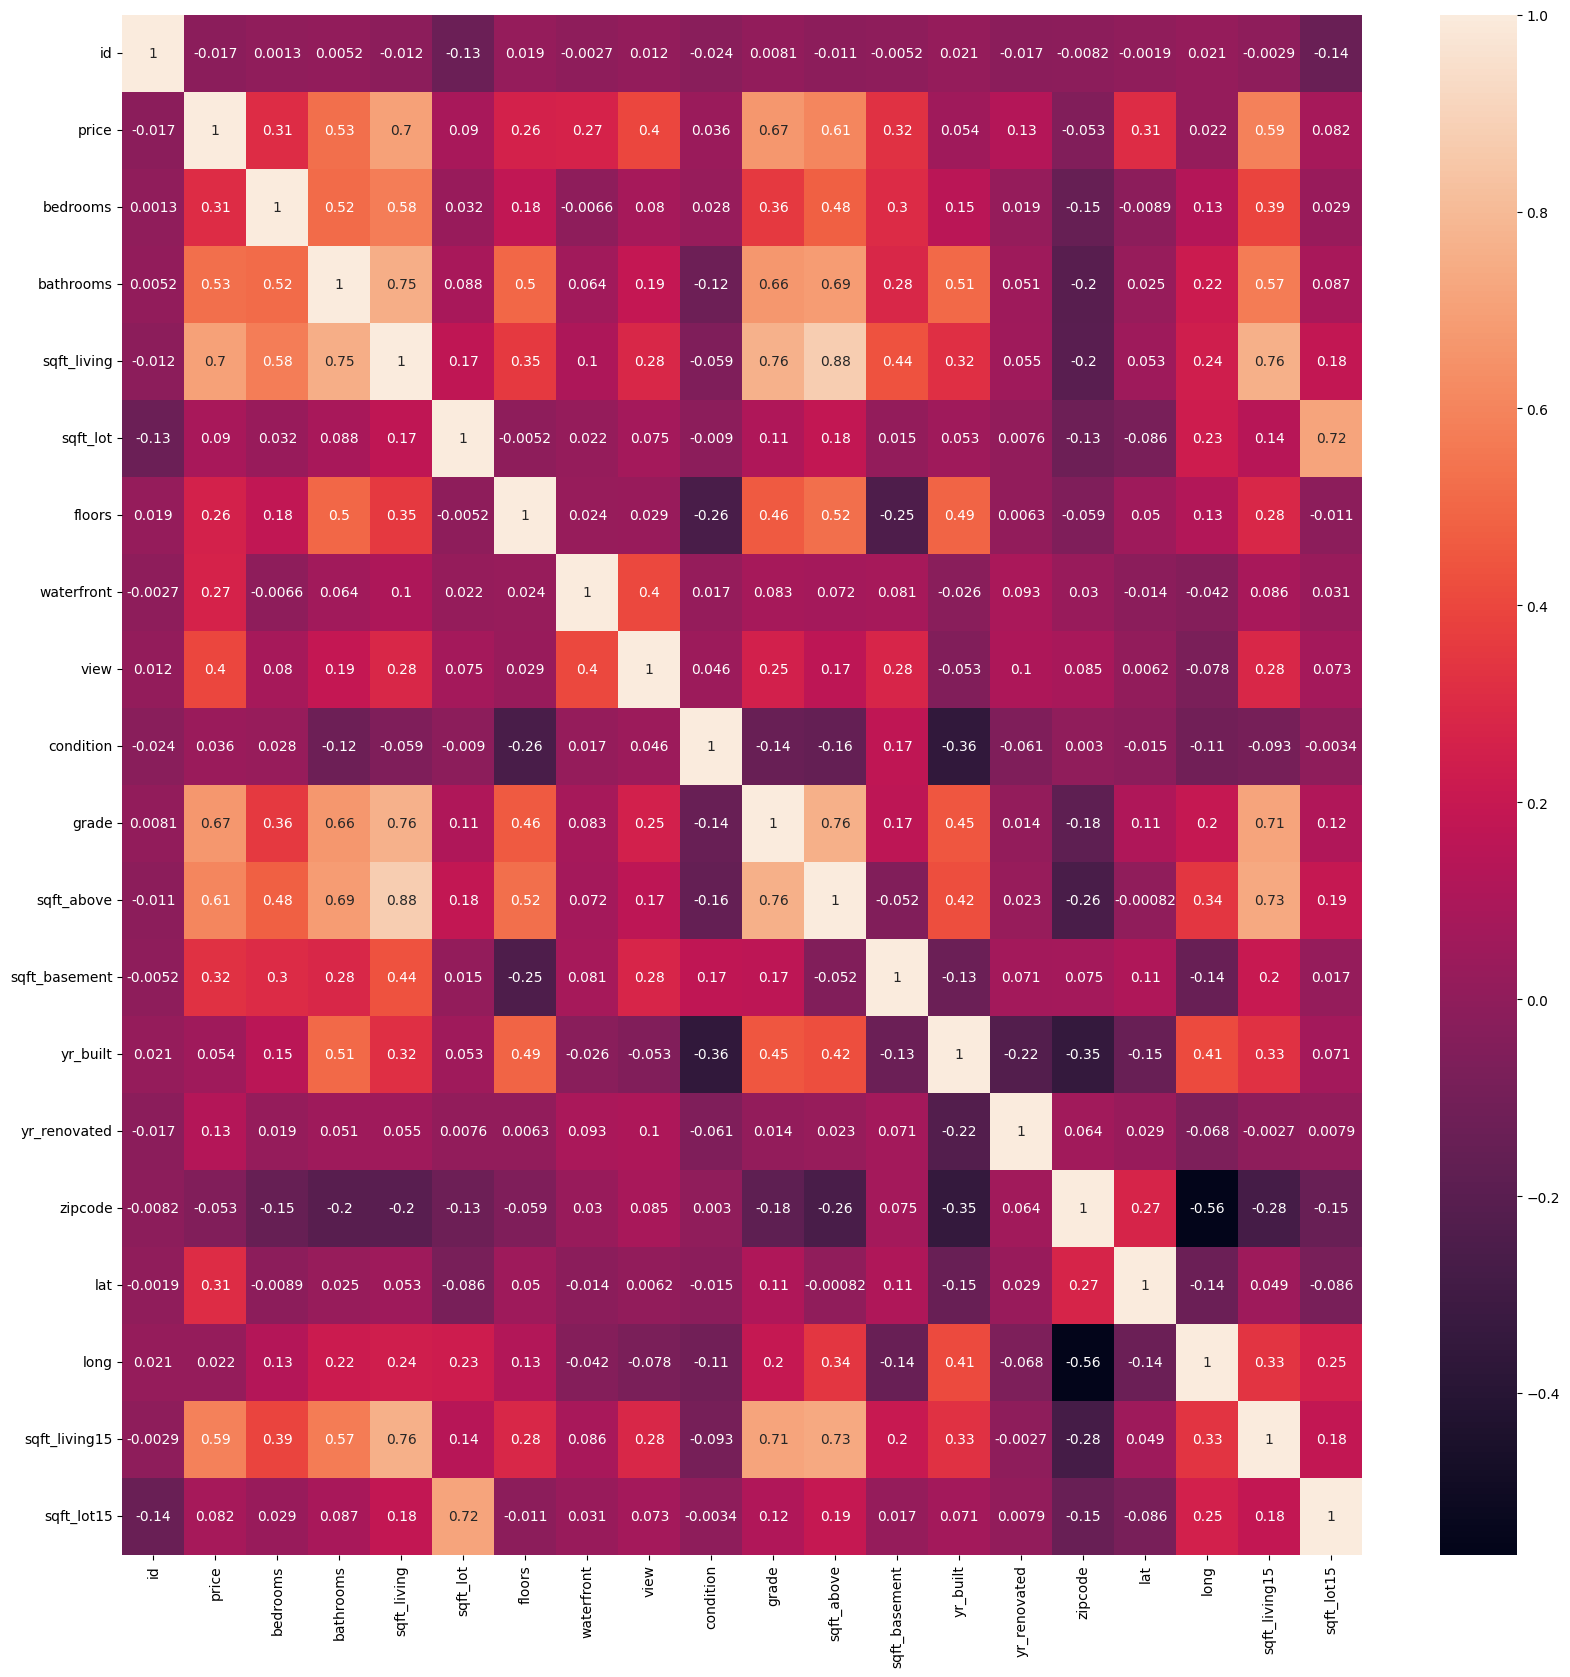

In [17]:
for col in casas.columns:
    casas[col] = pd.to_numeric(casas[col].astype(str).str.replace(',', '.'), errors='coerce')
figura = plt.figure(figsize=(20,20))
sns.heatmap(casas.corr(), annot=True)

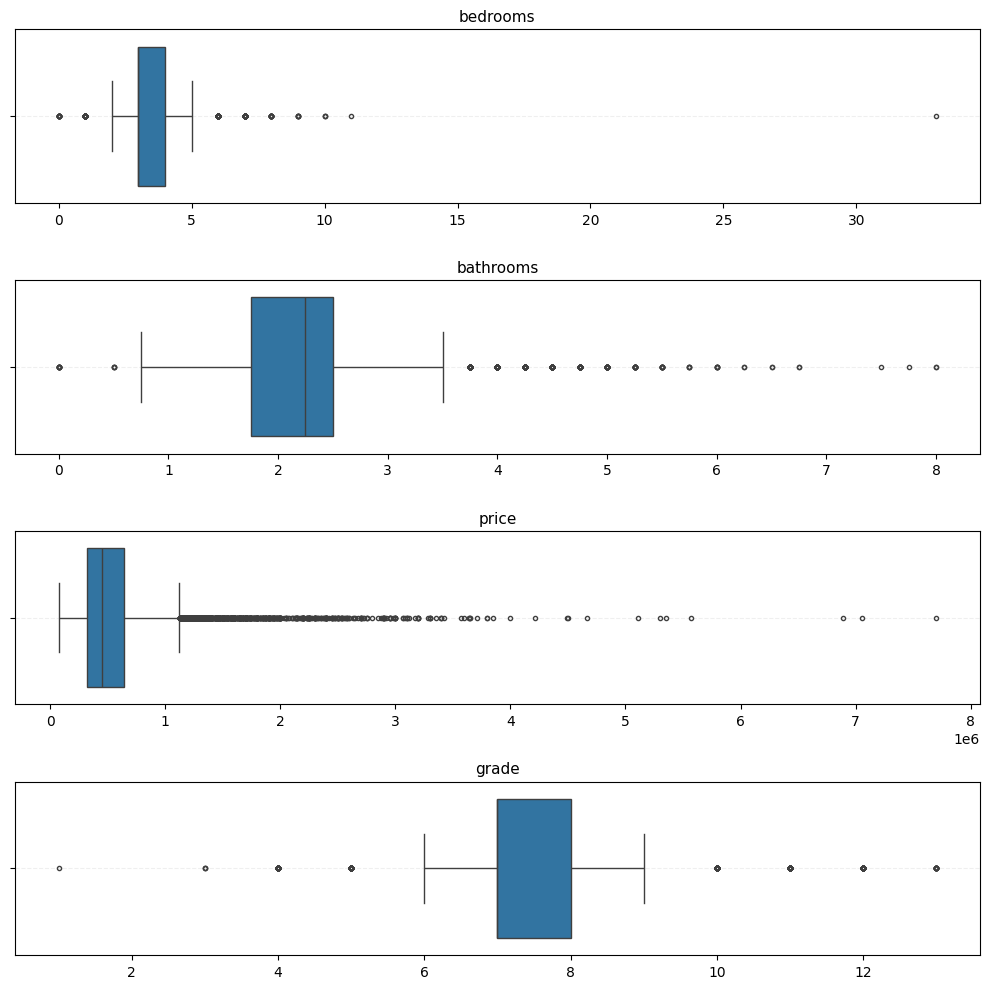

In [18]:
colunas = ['bedrooms', 'bathrooms', 'price', 'grade']

plt.figure(figsize=(10, 10))

for i, coluna in enumerate(colunas, 1):
    plt.subplot(len(colunas), 1, i)
    sns.boxplot(data=casas, x = coluna, fliersize=3, linewidth=1)
    plt.title(coluna, fontsize=11)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.2)
    
plt.tight_layout()

In [19]:
x_casas = casas.iloc[:, 2:18].values
x_casas

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [20]:
y_casas = casas.iloc[:,1].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [21]:
from sklearn.model_selection import train_test_split
x_casas_treinamento, x_casas_teste,y_casas_treinamento, y_casas_teste = train_test_split(x_casas, y_casas, test_size=0.3, random_state=0)

In [22]:
x_casas_treinamento.shape, x_casas_teste.shape

((15129, 16), (6484, 16))

In [23]:
regressor_multiplo = LinearRegression()
regressor_multiplo.fit(x_casas_treinamento, y_casas_treinamento)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
regressor_multiplo.score(x_casas_treinamento, y_casas_treinamento)

0.7029803117712328

In [25]:
regressor_multiplo.score(x_casas_teste, y_casas_teste)

0.6885848067378997

In [26]:
previssoes = regressor_multiplo.predict(x_casas_teste)
previssoes

array([ 383680.68473788, 1514992.97612493,  547024.88694498, ...,
        314898.99251631,  219328.66444585,  148051.43501939])

In [27]:
y_casas_teste

array([ 297000., 1580000.,  562100., ...,  380000.,  268000.,  206000.])

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_casas_teste, previssoes)
print(f"MAE: {mae}")

MAE: 123988.89512801937


In [29]:
mse = mean_squared_error(y_casas_teste, previssoes)
print(f"MSE: {mse}")

MSE: 42807464751.82685


In [30]:
rmse = np.sqrt(mean_squared_error(y_casas_teste, previssoes))
print(f"RMSE: {rmse}")

RMSE: 206899.64898913397


In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

In [32]:
x_casas_poly = poly.fit_transform(x_casas_treinamento)
x_casas_testes_poly = poly.transform(x_casas_teste)

In [38]:
regressor_casas_poly = LinearRegression()
regressor_casas_poly.fit(x_casas_poly, y_casas_treinamento)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
regressor_casas_poly.score(x_casas_poly, y_casas_treinamento)

0.7924960103853885

In [41]:
previsao = regressor_casas_poly.predict(x_casas_testes_poly)
previsao

array([ 442269.82108478, 1957760.66219453,  576667.33940057, ...,
        350720.77127532,  246745.58348349,  221140.22169713])

In [50]:
y_casas_teste

array([ 297000., 1580000.,  562100., ...,  380000.,  268000.,  206000.])

In [51]:
mean_absolute_error(y_casas_teste, previsao)

105352.79206031548

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor_arvore_casas = DecisionTreeRegressor()
regressor_arvore_casas.fit(x_casas_treinamento, y_casas_treinamento)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [46]:
regressor_arvore_casas.score(x_casas_treinamento, y_casas_treinamento)

0.9992719338525065

In [49]:
regressor_arvore_casas.score(x_casas_teste, y_casas_teste)

0.7155670280279525

In [ ]:
random forest